## SKlearn Youtube Video Part 1. Following along a youtube video on sklearn. 

In [41]:
# We will play witht the boston housing dataset.

from sklearn.datasets import load_boston
import pandas as pd

C:\Users\tradk\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
#Split the data into x and y

x,y = load_boston(return_X_y=True)

In [16]:
# We will apply the KNN model to the dataset. 

from sklearn.neighbors import KNeighborsRegressor

# We can also apply linear regression. 

from sklearn.linear_model import LinearRegression

In [17]:
# Intialize the model

model1 = KNeighborsRegressor()

model2 = LinearRegression()

In [19]:
# Fit the model to our dataset. 

model1.fit(x,y), model2.fit(x,y)


(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

In [22]:
# We do our predictions for model 1 and 2. 

pred1 = model1.predict(x)
pred2 = model2.predict(x)

pred1, pred2

(array([21.78, 22.9 , 25.36, 26.06, 27.1 , 27.1 , 20.88, 19.1 , 18.4 ,
        19.48, 19.28, 22.  , 24.34, 20.52, 24.66, 21.3 , 30.48, 20.4 ,
        15.7 , 23.54, 16.82, 17.64, 18.3 , 17.08, 16.66, 15.1 , 16.78,
        14.94, 19.94, 18.34, 14.1 , 16.82, 15.12, 14.1 , 15.12, 26.92,
        22.14, 27.4 , 28.44, 31.88, 31.88, 25.36, 25.36, 24.22, 20.68,
        20.44, 20.44, 18.1 , 18.1 , 24.  , 21.54, 24.  , 27.16, 27.16,
        25.7 , 39.82, 27.08, 38.28, 24.8 , 25.64, 21.78, 33.6 , 21.78,
        24.06, 31.74, 25.3 , 26.98, 22.18, 20.42, 20.42, 27.76, 29.5 ,
        27.76, 27.76, 22.92, 21.64, 25.82, 21.64, 21.38, 22.02, 24.8 ,
        21.88, 25.22, 25.64, 25.98, 25.98, 23.28, 25.98, 24.02, 25.58,
        25.58, 25.06, 26.34, 26.04, 30.1 , 24.84, 23.62, 24.32, 28.52,
        24.96, 22.1 , 22.2 , 15.34, 19.74, 19.74, 19.66, 19.56, 21.34,
        19.66, 19.56, 22.08, 20.1 , 19.6 , 17.54, 20.1 , 17.7 , 20.2 ,
        20.1 , 20.66, 19.8 , 22.76, 20.6 , 19.66, 18.52, 19.66, 20.6 ,
      

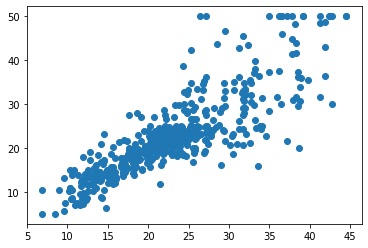

In [25]:
# look at the predictions of the model and also the actual values. 

import matplotlib.pylab as plt

plt.scatter(pred1, y)

In [26]:
#import next packages we need. 

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [34]:
# We will create a pipeline for our model. 

pipeline = Pipeline([
    ('Scale', StandardScaler()),
    ('model', KNeighborsRegressor())
    
])

pipeline.get_params()

{'memory': None,
 'steps': [('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('model',
   KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform'))],
 'verbose': False,
 'Scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'model': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 'Scale__copy': True,
 'Scale__with_mean': True,
 'Scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [29]:
#Apply the pipeline that we just created to the data. 

pipeline.fit(x,y)

Pipeline(memory=None,
         steps=[('Scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [30]:
#Make some predictions with the model. 

pred = pipeline.predict(x)

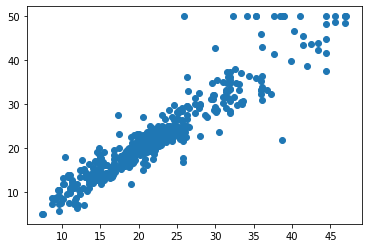

In [31]:
# Graph our predictions with the actual values. 

plt.scatter(pred,y)

In [33]:
# Here we start doing grindsearch for hyper-parameters. 

from sklearn.model_selection import GridSearchCV

In [37]:
# We do the gridsearch on n neighbors for this example only. 

mod = GridSearchCV(estimator= pipeline,
             param_grid= {'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
             cv = 3)

In [42]:
# Now we use the new improved model for our initial dataset

mod.fit(x,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002676,0.003785,0.005318,0.003760,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002666,0.003770,0.002666,0.003770,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.000000,0.000000,0.005330,0.003769,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.002666,0.003770,0.005338,0.003775,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001024,0.001448,0.000000,0.000000,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000000,0.000000,0.005209,0.007366,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.000000,0.000000,0.005207,0.007364,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.005207,0.007364,0.000000,0.000000,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.005207,0.007364,0.000000,0.000000,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000000,0.000000,0.005207,0.007364,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
